## Import the Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## Import the Dataset

In [3]:
df=pd.read_csv(r"/home/mayur/Desktop/Assignment_4/DATA.csv")
df.head()

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12


## EDA

In [4]:
df.shape

(23, 2)

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  23 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


In [8]:
# Checking missing value
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
df.isna().mean()

Hours     0.0
Scores    0.0
dtype: float64

In [10]:
# Checking Outliers
iqr = 7.100000 - 2.650000
iqr

4.449999999999999

<Axes: >

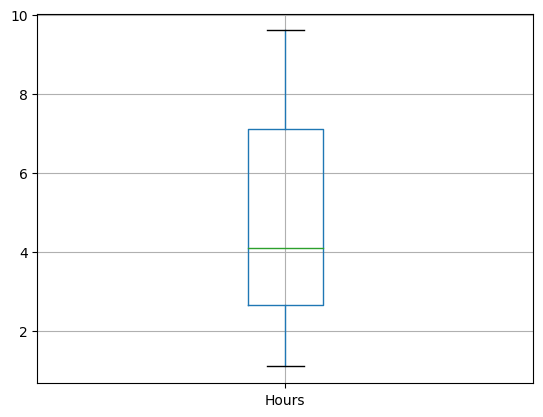

In [11]:
df[["Hours"]].boxplot()

<Axes: >

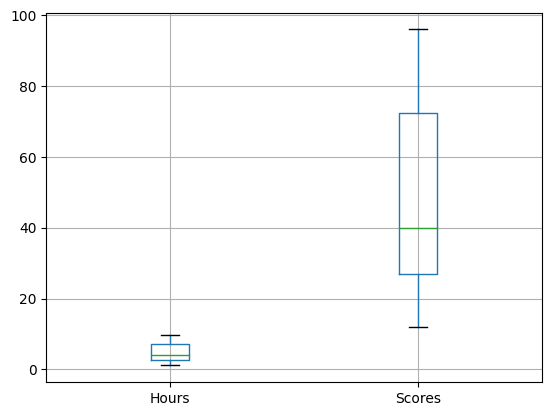

In [12]:
df.boxplot()

In [13]:
df.corr()

,Hours,Scores
Hours,1.000000,0.997656
Scores,0.997656,1.000000


<Axes: >

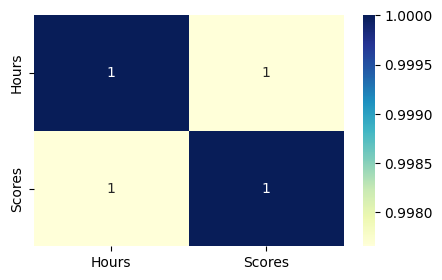

In [14]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu")

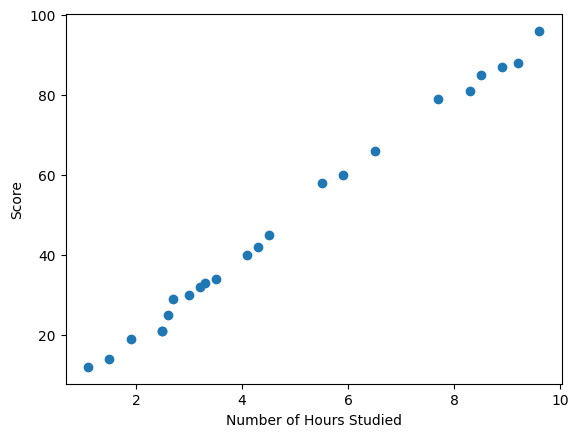

In [15]:
# plot the data as a scatter plot
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Number of Hours Studied')
plt.ylabel('Score')
plt.show()

In [16]:
corr_coef = np.corrcoef(df['Hours'], df['Scores'])[0, 1]
print("Correlation coefficient:", corr_coef)

Correlation coefficient: 0.9976561911453918


In [17]:
df.var()

Hours       7.342411
Scores    734.584980
dtype: float64

## Train Test Split

In [18]:
x = df.drop("Scores",axis = 1) 
y = df['Scores']  

In [19]:
# Split the Data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.head()

,Hours
12,1.5
1,5.9
13,3.5
5,8.9
2,4.5


## Instantiating Linear Regression Model

In [21]:
linear_reg_model = LinearRegression() 
linear_reg_model.fit(x_train,y_train)

LinearRegression()

### Evaluation of Trainig Data

In [22]:
y_pred_train = linear_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value is :",r2_value)

Mean Squared Error : 2.6707916515489223
Root Mean Squared Error : 1.6342556873234133
Mean Absolute Error : 1.233728986333557
R-Squared Value is : 0.996233163586454


### Evaluation of Testing Data

In [23]:
y_pred = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r2_value = r2_score(y_test, y_pred)  
print("R-Squared Value is :",r2_value)

Mean Squared Error : 5.563848077994372
Root Mean Squared Error : 2.358781057663973
Mean Absolute Error : 2.076986471777333
R-Squared Value is : 0.9918063029011629


## Instantiating Lasso Regression Model

In [25]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)

Lasso()

### Training Data Evaluation

In [26]:
y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value :",r2_value)

Mean Squared Error : 2.8107387826327335
RMSE : 1.6765258073267866
MAE : 1.2697956080789228
R-Squared Value : 0.9960357846748373


### Testing Data Evaluation

In [27]:
y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value :",r2_value)

Mean Squared Error : 6.022737136326095
RMSE : 2.4541265526305067
MAE : 2.0210076193437994
R-Squared Value : 0.9911305119929222


## Lasso with Hyperparameter tunning

In [28]:
lasso_model = Lasso()
hyperparameter_grid = {"alpha" : np.arange(0.05,1.1,0.001)}

gscv_lasso_model = GridSearchCV(lasso_model,hyperparameter_grid,cv = 5)
gscv_lasso_model.fit(x_train, y_train)
gscv_lasso_model.best_estimator_

Lasso(alpha=0.25300000000000017)

In [30]:
lasso_model = Lasso(alpha=0.25300000000000017)
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.25300000000000017)

### Training Data Evaluation

In [31]:
y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value :",r2_value)

Mean Squared Error : 2.6797495274624654
RMSE : 1.6369940523601378
MAE : 1.2408103111663984
R-Squared Value : 0.9962205295597003


### Testing Data Evaluation

In [32]:
y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value :",r2_value)

Mean Squared Error : 5.655576818081622
RMSE : 2.3781456679693997
MAE : 2.062823822111646
R-Squared Value : 0.9916712169856243


## Instantiating Decision Tree Model

In [33]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

### Evaluation of Training Data

In [34]:
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R-Squared :",r2)

MSE : 0.0
RMSE : 0.0
MAE : 0.0
R-Squared : 1.0


### Evaluation of Testing Data

In [35]:
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse =np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R-Squared :",r2)

MSE : 13.8
RMSE : 3.714835124201342
MAE : 3.0
R-Squared : 0.9796771913289349


## Instantiating Decision Tree Model with hyperparameter tunning

In [41]:
dt_reg = DecisionTreeRegressor(random_state=20)

hyperparameters = {
    "max_depth":np.arange(1,11)     
}

gscv_dt_reg = GridSearchCV(dt_reg, hyperparameters, cv=5)
gscv_dt_reg.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=20),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [42]:
dt_reg = gscv_dt_reg.best_estimator_
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=20)

### Training Data Accuracy after hyperparameter tunning

In [43]:
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r_squared_value = r2_score(y_train,y_pred_train)
print("r_squared_value",r_squared_value)

MSE : 0.2777777777777778
RMSE : 0.5270462766947299
MAE : 0.3333333333333333
r_squared_value 0.9996082272282076


### Testing Data Accuracy after hyperparameter tunning

In [44]:

y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r_squared_value = r2_score(y_test,y_pred)
print("r_squared_value",r_squared_value)

MSE : 14.25
RMSE : 3.774917217635375
MAE : 3.3
r_squared_value 0.9790144910461829


## Instantiating Random Forest Model

In [45]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluation on Training Data

In [46]:
y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value :",r2_value)

MSE : 1.6410111111111112
RMSE : 1.2810195592226963
MAE : 0.9466666666666667
R-Squared Value : 0.9976855475024485


## Evaluation on Testing Data

In [47]:
y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value :",r2_value)

MSE : 8.865680000000001
RMSE : 2.9775291770190937
MAE : 2.319999999999999
R-Squared Value : 0.9869438030160226


## Instantiating Random Forest Model with hyperparameter tunning

In [49]:
rf_model = RandomForestRegressor(random_state=30)

hyp = {
    "n_estimators":[10,50,100,200],   
    "max_depth" : np.arange(1,11)    
}

rscv_rf_clf = RandomizedSearchCV(rf_model, hyp, cv = 5)
rscv_rf_clf.fit(x_train,y_train)
rscv_rf_clf.best_estimator_

RandomForestRegressor(max_depth=8, n_estimators=50, random_state=30)

In [50]:
rf_reg = rscv_rf_clf.best_estimator_
rf_reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=50, random_state=30)

### Evaluation on Training Data

In [51]:
y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value :",r2_value)

MSE : 2.028377777777779
RMSE : 1.4242112827027382
MAE : 1.0122222222222228
R-Squared Value : 0.9971392125367287


### Evaluation on Testing Data

In [52]:
y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value :",r2_value)

MSE : 10.71408000000001
RMSE : 3.2732369300128594
MAE : 2.5920000000000014
R-Squared Value : 0.9842217247879359


## Prediction

In [54]:
Result=pd.DataFrame({"Model":["linear_regression","lasso_regression","decision_tree","random_forest"]})
Result["RMSE"]=["2.07698","2.0628","2.97752","3.2732369"]
Result["Accuracy"]=["0.99180","0.99167","0.98694","0.98422"]
Result

,Model,RMSE,Accuracy
0,linear_regression,2.07698,0.99180
1,lasso_regression,2.0628,0.99167
2,decision_tree,2.97752,0.98694
3,random_forest,3.2732369,0.98422


## Testing

In [57]:
def get_predicted_score(Hours):
    array=np.array([[Hours]])
    pred_score=rf_reg.predict(array)
    print(f"Predicted Score value is : {pred_score}" )
    return pred_score
get_predicted_score(5.9)

Predicted Score value is : [59.04]


array([59.04])

In [63]:
def get_predicted_score(Hours):
    array=np.array([[Hours]])
    pred_score=rf_reg.predict(array)
    print(f"Predicted Score value is : {pred_score}" )
    return pred_score
get_predicted_score(3.2)

Predicted Score value is : [32.26]


array([32.26])

## Save Model

In [64]:
import pickle
with open('rf_reg.pkl','wb') as f:
    pickle.dump(rf_reg,f)